<a href="https://colab.research.google.com/github/Porras53/Proyecto-Ciencia-de-datos-202320/blob/main/Proyecto%20OPAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns; sns.set()  # for plot styling
import locale
from difflib import SequenceMatcher
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

# Carga de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
directorio="/content/drive/My Drive/OPAIN_DATA/"
archivo_marca1= pd.read_excel(directorio +"Informacion Bases de datos Comercial Marca 1.xlsx", sheet_name=None)
archivo_marca2_10= pd.read_excel(directorio +"Informacion Bases de datos Comercial Marca 2 - 10.xlsx", sheet_name=None)

In [ ]:
archivo_marca2_10.keys()

dict_keys(['Marca 2', 'Marca 3', 'Marca 4', 'Marca 5', 'Marca 6', 'Marca 7', 'marca 8', 'marca 9', 'marca 10'])

In [ ]:
def sacar_anio(entrada):
    return entrada.year
def sacar_mes(entrada):
    return entrada.month
def sacar_dia(entrada):
    return entrada.day
def obt_horas_minutos_marca4(entrada):
    entrada=  entrada.replace(".0","")
    return entrada.split(":")[1] + ":"+ entrada.split(":")[2]
def obt_horas_marca8(entrada):
    return entrada.split(":")[0]
def obt_horas_minutos_marca8(entrada):
    return entrada[:-3]
def obt_horas_minutos_marca10(entrada):
    return entrada.split(":")[1] + ":"+ entrada.split(":")[2]
def cambiar_categoria_marca3(entrada):
    if entrada=="textiles":
        return "textiles de regalo"
    elif entrada=="tecno":
        return "tecnologia"
    elif entrada=="librería":
        return "libros"
    elif entrada=="belleza":
        return "cuidado personal"
    elif entrada=="alimentos":
        return "comida"
    elif entrada=="licor":
        return "vicios"
    elif entrada=="juguetes":
        return "juegos y juguetes"
    else:
        return entrada

In [ ]:
marca1=archivo_marca1['MARCA 1'].copy()
marca1=marca1.rename(columns={'Fecha de Venta':'fecha_de_venta','Centro de consumo':'tienda','Ventas Netas':'ventas','ZONA':'muelle','HORA':'hora_entera','TRANSACCIONES':'transacciones','SEMANA':'semana','Año':'anio_entero','Mes':'mes_entero','Día':'dia_entero','Mes(2)':'mes_string'})
marca1['marca'] = 'marca1'
marca1.info()

marca2=archivo_marca2_10['Marca 2'].copy()
# marca2=marca2.drop(columns=['Unnamed: 7','Unnamed: 8','Unnamed: 9'])
marca2=marca2.rename(columns={'Fecha':'fecha_de_venta','Tienda':'tienda','Ventas':'ventas','Muelle':'muelle','Hora entera':'hora_entera','Transacciones':'transacciones','Unidades':'unidades'})
marca2['marca'] = 'marca2'
marca2['anio_entero'] = marca2['fecha_de_venta'].apply(sacar_anio)
marca2['mes_entero'] = marca2['fecha_de_venta'].apply(sacar_mes)
marca2['dia_entero'] = marca2['fecha_de_venta'].apply(sacar_dia)
marca2['mes_string'] = marca2['fecha_de_venta'].dt.strftime('%B')
marca2['semana'] = marca2['fecha_de_venta'].dt.week
# dates.dt.week
marca2.info()
marca2.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83370 entries, 0 to 83369
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha_de_venta  83370 non-null  datetime64[ns]
 1   tienda          83370 non-null  object        
 2   ventas          83370 non-null  int64         
 3   muelle          83370 non-null  object        
 4   hora_entera     83282 non-null  float64       
 5   transacciones   83282 non-null  float64       
 6   semana          83370 non-null  int64         
 7   anio_entero     83370 non-null  int64         
 8   mes_entero      83370 non-null  int64         
 9   dia_entero      83370 non-null  int64         
 10  mes_string      83370 non-null  object        
 11  marca           83370 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 7.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22297 entries, 0 to 22296
Data c

,tienda,hora_entera,fecha_de_venta,ventas,transacciones,unidades,muelle,marca,anio_entero,mes_entero,dia_entero,mes_string,semana
0,Tienda A,7,2022-01-01,27121380.0,7,23,Internacional Oriente,marca2,2022,1,1,January,52
1,Tienda A,8,2022-01-01,4636320.0,3,5,Internacional Oriente,marca2,2022,1,1,January,52
2,Tienda A,9,2022-01-01,10518300.0,4,12,Internacional Oriente,marca2,2022,1,1,January,52
3,Tienda A,10,2022-01-01,9620520.0,6,16,Internacional Oriente,marca2,2022,1,1,January,52
4,Tienda A,11,2022-01-01,22212840.0,7,21,Internacional Oriente,marca2,2022,1,1,January,52


In [ ]:
marca4=archivo_marca2_10['Marca 4'].copy()
marca4=marca4.rename(columns={'FECHA':'fecha_de_venta','TIENDA1':'tienda','TOTAL_LOC':'ventas','Muelle':'muelle','HORA ENTERA':'hora_entera','HORA':'hora_minutos','TRANSACCIONES':'transacciones','UNIDADES':'unidades','CATEGORÍA':'categoria','Num fact':'num_fact','DESCRIPCION':'descripcion','PRECIO_NETO_LOC':'precio_neto_loc','PRECIO_BRUTO_LOC':'precio_bruto_loc','IMPUESTO_LOC':'impuesto_loc','DESCUENTO_LOC':'descuento_loc'})
marca4['marca'] = 'marca4'
marca4['anio_entero'] = marca4['fecha_de_venta'].apply(sacar_anio)
marca4['mes_entero'] = marca4['fecha_de_venta'].apply(sacar_mes)
marca4['dia_entero'] = marca4['fecha_de_venta'].apply(sacar_dia)
marca4['mes_string'] = marca4['fecha_de_venta'].dt.strftime('%B')
marca4['semana'] = marca4['fecha_de_venta'].dt.week
marca4['hora_minutos'] = marca4['hora_minutos'].apply(obt_horas_minutos_marca4)
marca4['ventas_sin_iva'] = round(marca4['precio_neto_loc'] * marca4['unidades'],0)
marca4['impuesto_loc'] = round(marca4['impuesto_loc'],0)
marca4['categoria']=marca4['categoria'].str.lower()
marca4['categoria'].unique()
marca4_dummies_cat = pd.get_dummies(marca4.categoria)
marca4_dummies_cat.info()
marca4_dummies_cat.columns
marca4=pd.concat([marca4,marca4_dummies_cat],axis=1)
marca4.info()
marca4_agrupado=marca4.groupby(by=['tienda','anio_entero','mes_entero','dia_entero','hora_entera']).sum()[['ventas_sin_iva','precio_bruto_loc','impuesto_loc','descuento_loc','unidades','ventas','transacciones','alimentos y bebidas retail', 'artesanias', 'articulos de viaje',
       'cafe', 'comida', 'complementos cafe', 'cuidado personal', 'golosinas',
       'joyeria', 'juegos y juguetes', 'libros', 'productos de papel',
       'reposteria dulce', 'revistas y periodicos', 'souvenirs', 'tecnologia',
       'textiles de playa', 'textiles de regalo', 'vicios']].reset_index()
columnas_esp=['tienda','muelle','fecha_de_venta','hora_entera','marca','anio_entero','mes_entero','dia_entero','mes_string','semana']
marca4_conglomerado= marca4.drop_duplicates(subset=['tienda','anio_entero','mes_entero','dia_entero','hora_entera'])[columnas_esp].merge(marca4_agrupado,on=['tienda','anio_entero','mes_entero','dia_entero','hora_entera'],how="left")
marca4_conglomerado=marca4_conglomerado.rename(columns={'precio_bruto_loc':'precio_bruto_total','impuesto_loc':'impuesto_total','descuento_loc':'descuento_total'})
marca4_conglomerado.info()
marca4_conglomerado.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037749 entries, 0 to 1037748
Data columns (total 19 columns):
 #   Column                      Non-Null Count    Dtype
---  ------                      --------------    -----
 0   alimentos y bebidas retail  1037749 non-null  uint8
 1   artesanias                  1037749 non-null  uint8
 2   articulos de viaje          1037749 non-null  uint8
 3   cafe                        1037749 non-null  uint8
 4   comida                      1037749 non-null  uint8
 5   complementos cafe           1037749 non-null  uint8
 6   cuidado personal            1037749 non-null  uint8
 7   golosinas                   1037749 non-null  uint8
 8   joyeria                     1037749 non-null  uint8
 9   juegos y juguetes           1037749 non-null  uint8
 10  libros                      1037749 non-null  uint8
 11  productos de papel          1037749 non-null  uint8
 12  reposteria dulce            1037749 non-null  uint8
 13  revistas y periodicos      

,tienda,muelle,fecha_de_venta,hora_entera,marca,anio_entero,mes_entero,dia_entero,mes_string,semana,...,juegos y juguetes,libros,productos de papel,reposteria dulce,revistas y periodicos,souvenirs,tecnologia,textiles de playa,textiles de regalo,vicios
0,Tienda 1,Internacional Oriente,2022-01-01,0,marca4,2022,1,1,January,52,...,0,0,0,0,0,5,0,0,2,1
1,Tienda 1,Internacional Oriente,2022-01-01,1,marca4,2022,1,1,January,52,...,1,0,0,0,0,1,0,0,0,0
2,Tienda 1,Internacional Oriente,2022-01-01,3,marca4,2022,1,1,January,52,...,1,0,0,0,0,8,0,0,2,0
3,Tienda 1,Internacional Oriente,2022-01-01,4,marca4,2022,1,1,January,52,...,0,0,0,0,0,5,0,0,0,0
4,Tienda 1,Internacional Oriente,2022-01-01,5,marca4,2022,1,1,January,52,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
marca3=archivo_marca2_10['Marca 3'].copy()
marca3=marca3.drop(columns=['Unnamed: 9'])
marca3=marca3.rename(columns={'FECHA':'fecha_de_venta','Cód tienda':'tienda','VENTAS':'ventas','UBICACIÓN':'muelle','Hora entera':'hora_entera','TRANSACCIONES':'transacciones','UNIDADES':'unidades','CATEGORÍA':'categoria','Tipo de tienda':'tipo_de_tienda'})
marca3= marca3[~(marca3['ventas']==0)]
marca3['marca'] = 'marca3'
marca3['anio_entero'] = marca3['fecha_de_venta'].apply(sacar_anio)
marca3['mes_entero'] = marca3['fecha_de_venta'].apply(sacar_mes)
marca3['dia_entero'] = marca3['fecha_de_venta'].apply(sacar_dia)
marca3['mes_string'] = marca3['fecha_de_venta'].dt.strftime('%B')
marca3['semana'] = marca3['fecha_de_venta'].dt.week
marca3.info()
marca3['categoria']=marca3['categoria'].str.lower()
marca3['categoria']= marca3['categoria'].apply(cambiar_categoria_marca3)
marca3['categoria'].unique()
marca3_dummies_cat = pd.get_dummies(marca3.categoria)
marca3_dummies_cat.info()
marca3=pd.concat([marca3,marca3_dummies_cat],axis=1)
marca3.info()
cols_groupby=['tienda','anio_entero','mes_entero','dia_entero','hora_entera']
cols_merge=['tienda','anio_entero','mes_entero','dia_entero','hora_entera','semana','tipo_de_tienda','fecha_de_venta','marca','mes_string']
marca3_conglomerado=marca3.groupby(by=cols_groupby).sum().drop(columns=['semana']).reset_index().merge(marca3.drop_duplicates(subset=cols_groupby)[cols_merge],on=cols_groupby,how="left").copy()
marca3_conglomerado.info()
marca3_conglomerado.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235931 entries, 0 to 236964
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   tienda          235931 non-null  object        
 1   tipo_de_tienda  235931 non-null  object        
 2   muelle          235931 non-null  object        
 3   fecha_de_venta  235931 non-null  datetime64[ns]
 4   ventas          235931 non-null  float64       
 5   hora_entera     235931 non-null  int64         
 6   transacciones   235931 non-null  int64         
 7   unidades        235931 non-null  float64       
 8   categoria       235931 non-null  object        
 9   Unnamed: 10     1 non-null       object        
 10  marca           235931 non-null  object        
 11  anio_entero     235931 non-null  int64         
 12  mes_entero      235931 non-null  int64         
 13  dia_entero      235931 non-null  int64         
 14  mes_string      235931 non-null  obj

,tienda,anio_entero,mes_entero,dia_entero,hora_entera,ventas,transacciones,unidades,accesorios,comida,...,perfumería,souvenirs,tecnologia,textiles de regalo,vicios,semana,tipo_de_tienda,fecha_de_venta,marca,mes_string
0,Tienda 1,2022,1,1,6,157818326.0,34,61.0,0,0,...,1,1,1,0,1,52,DUTY FREE,2022-01-01,marca3,January
1,Tienda 1,2022,1,1,7,120266134.6,26,41.0,0,1,...,1,1,1,0,1,52,DUTY FREE,2022-01-01,marca3,January
2,Tienda 1,2022,1,1,8,18215139.6,8,22.0,0,0,...,0,1,1,0,1,52,DUTY FREE,2022-01-01,marca3,January
3,Tienda 1,2022,1,1,9,24501991.4,8,16.0,0,0,...,1,0,1,0,1,52,DUTY FREE,2022-01-01,marca3,January
4,Tienda 1,2022,1,1,10,123980078.8,23,56.0,0,0,...,1,1,1,1,1,52,DUTY FREE,2022-01-01,marca3,January


In [ ]:
marca5=archivo_marca2_10['Marca 5'].copy()
marca5=marca5.rename(columns={'Fecha':'fecha_de_venta','Ventas':'ventas','Hora entera':'hora_entera','Transacciones':'transacciones','Unidades':'unidades','Muelle':'muelle','DESTINO ':'destino','AEROLINEA':'aerolinea','Descripción del producto':'descripcion'})
marca5['marca'] = 'marca5'
marca5['anio_entero'] = marca5['fecha_de_venta'].apply(sacar_anio)
marca5['mes_entero'] = marca5['fecha_de_venta'].apply(sacar_mes)
marca5['dia_entero'] = marca5['fecha_de_venta'].apply(sacar_dia)
marca5['mes_string'] = marca5['fecha_de_venta'].dt.strftime('%B')
marca5['semana'] = marca5['fecha_de_venta'].dt.week
marca5['tienda'] = 'marca 5'
marca5['descripcion'] = marca5['descripcion'].str.lower()
marca5.info()
categorias=['almohada','billetera','bolso','bolso de viaje','cafe','chaqueta','cosmetiquero','zapato','media','accesorio','morral','mocasin','gorra beisbolera','gafa','sandalia','gorra','tarjetero','ruana','pañoleta','camiseta','tacon','aguadeño','aerpos',
           'tapaboca','libro','baul','cinturon','correa','capa','cambio','canguro','carriel','casa hogar','cardigan','cartuchera','estuche','chal','maleta','maleta de viaje','suspiro','fragancia','manos libres','llavero','descripcion','alimento','oficina',
           'brazelete','monedero','neceser','obsequio','sombrero','prenda','papelera','esmeralda','joya','tarjetero','tula herencia','tejido','riñonera','shoulder','botella','hebilla','tira','faja de seguridad','calzado','cruzado','portadocumentos','porta pasaporte','porta pc',
           'marroquineria','limpiador','linea ejecutiva','linea de viaje','pulsera','lederter band','escritorio']
marca5['descripcion']=marca5['descripcion'].str.replace("-",'+')
marca5['descripcion']=marca5['descripcion'].str.replace(",",'+')
marca5['descripcion']=marca5['descripcion'].str.replace("y",'+')
marca5['descripcion']=marca5['descripcion'].str.strip()
list_objetos=[[],[],[],[],[]]
for descripcion in marca5['descripcion']:
    if isinstance(descripcion,float):
        list_objetos[0].append("")
        list_objetos[1].append("")
        list_objetos[2].append("")
        list_objetos[3].append("")
        list_objetos[4].append("")
        continue
    descripcion_list=descripcion.split("+")
    cont=0
    for descripcion_unica in descripcion_list:
        lista_valores=[]
        for categoria in categorias:
            lista_valores.append(SequenceMatcher(None, descripcion_unica, categoria).ratio())
        valor_max=max(lista_valores)
        posicion_lista=lista_valores.index(valor_max)
        list_objetos[cont].append(categorias[posicion_lista])
        cont= cont+1
    if len(descripcion_list)==0:
        list_objetos[0].append("")
        list_objetos[1].append("")
        list_objetos[2].append("")
        list_objetos[3].append("")
        list_objetos[4].append("")
    elif len(descripcion_list)==1:
        list_objetos[1].append("")
        list_objetos[2].append("")
        list_objetos[3].append("")
        list_objetos[4].append("")
    elif len(descripcion_list)==2:
        list_objetos[2].append("")
        list_objetos[3].append("")
        list_objetos[4].append("")
    elif len(descripcion_list)==3:
        list_objetos[3].append("")
        list_objetos[4].append("")
    elif len(descripcion_list)==4:
        list_objetos[4].append("")
len(list_objetos[0])
marca5['objeto1']=list_objetos[0]
marca5['objeto2']=list_objetos[1]
marca5['objeto3']=list_objetos[2]
marca5['objeto4']=list_objetos[3]
marca5['objeto5']=list_objetos[4]
lista_objetos_totales = list(marca5['objeto1'].unique()) +list(marca5['objeto2'].unique()) + list(marca5['objeto3'].unique()) + list(marca5['objeto4'].unique()) + list(marca5['objeto5'].unique())
lista_objetos_totales = pd.Series(lista_objetos_totales).unique()
lista_objetos_totales
# Falta generar dummies de cada fila de objeto , sumarlas, y dejar las columnas restantes como las dummies de la marca 5.
#Generate dummies
dummies_obj1=pd.get_dummies(marca5['objeto1'])
for columna in dummies_obj1.columns:
    dummies_obj1.rename(columns={columna:columna+"_obj1"},inplace=True)
dummies_obj2=pd.get_dummies(marca5['objeto2'])
for columna in dummies_obj2.columns:
    dummies_obj2.rename(columns={columna:columna+"_obj2"},inplace=True)
dummies_obj3=pd.get_dummies(marca5['objeto3'])
for columna in dummies_obj3.columns:
    dummies_obj3.rename(columns={columna:columna+"_obj3"},inplace=True)
dummies_obj4=pd.get_dummies(marca5['objeto4'])
for columna in dummies_obj4.columns:
    dummies_obj4.rename(columns={columna:columna+"_obj4"},inplace=True)
dummies_obj5=pd.get_dummies(marca5['objeto5'])
for columna in dummies_obj5.columns:
    dummies_obj5.rename(columns={columna:columna+"_obj5"},inplace=True)
dummies_todos_obj=pd.concat([dummies_obj1,dummies_obj2,dummies_obj3,dummies_obj4,dummies_obj5]).info()
for objeto in lista_objetos_totales:
    sum_value = 0
    for i, dummy in enumerate([dummies_obj1, dummies_obj2, dummies_obj3, dummies_obj4, dummies_obj5], 1):
        key = "{}_obj{}".format(objeto, i) # Te quiero mucho python format
        sum_value += dummy.get(key, 0) # Obtengo el valor de la llave, si no existe, devuelvo 0
    marca5[objeto] = sum_value

marca5_fin=marca5.drop(columns=['destino','aerolinea']).copy()
marca5_fin.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10972 entries, 0 to 10971
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha_de_venta  10972 non-null  datetime64[ns]
 1   hora_entera     10972 non-null  int64         
 2   ventas          10972 non-null  int64         
 3   transacciones   10972 non-null  int64         
 4   unidades        10972 non-null  int64         
 5   descripcion     10961 non-null  object        
 6   destino         10918 non-null  object        
 7   aerolinea       10909 non-null  object        
 8   muelle          10972 non-null  object        
 9   marca           10972 non-null  object        
 10  anio_entero     10972 non-null  int64         
 11  mes_entero      10972 non-null  int64         
 12  dia_entero      10972 non-null  int64         
 13  mes_string      10972 non-null  object        
 14  semana          10972 non-null  int64         
 15  ti

In [ ]:
marca6=archivo_marca2_10['Marca 6'].copy()
marca6=marca6.rename(columns={'Fecha':'fecha_de_venta','Ventas':'ventas','Hora de venta':'hora_entera','Transacciones':'transacciones','Unidades':'unidades','Muelle':'muelle','Categoría':'categoria','Subcategoría':'subcategoria'})
marca6= marca6[~(marca6['ventas']==0)]
marca6['marca'] = 'marca6'
marca6['anio_entero'] = marca6['fecha_de_venta'].apply(sacar_anio)
marca6['mes_entero'] = marca6['fecha_de_venta'].apply(sacar_mes)
marca6['dia_entero'] = marca6['fecha_de_venta'].apply(sacar_dia)
marca6['mes_string'] = marca6['fecha_de_venta'].dt.strftime('%B')
marca6['semana'] = marca6['fecha_de_venta'].dt.week
marca6['tienda'] = 'marca 6'
marca6['categoria'] = marca6['categoria'] + " " + marca6['subcategoria']
marca6=marca6.drop(columns=['subcategoria'])
marca6['categoria']= marca6['categoria'].str.lower()
marca6['transacciones']= marca6['transacciones'].astype(int)
marca6.info()
marca6['categoria'].unique()
marca6['transacciones'].unique()
marca6_dummies_cat = pd.get_dummies(marca6.categoria)
marca6_dummies_cat.info()
marca6=pd.concat([marca6,marca6_dummies_cat],axis=1)
marca6.iloc[:,:20].head()
marca6['transacciones'].unique()
cols_groupby_6=['anio_entero','mes_entero','dia_entero','hora_entera']
cols_merge_6=['tienda','anio_entero','mes_entero','dia_entero','hora_entera','semana','fecha_de_venta','marca','mes_string']
marca6_conglomerado=marca6.groupby(by=cols_groupby_6).sum().drop(columns=['semana']).reset_index().merge(marca6.drop_duplicates(subset=cols_groupby_6)[cols_merge_6],how="left",on=cols_groupby_6)
marca6_conglomerado.info()
marca6_conglomerado.sample(10)
marca6_conglomerado['transacciones'].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34669 entries, 0 to 43794
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha_de_venta  34669 non-null  datetime64[ns]
 1   categoria       34669 non-null  object        
 2   hora_entera     34669 non-null  float64       
 3   ventas          34669 non-null  int64         
 4   unidades        34669 non-null  float64       
 5   transacciones   34669 non-null  int64         
 6   muelle          34669 non-null  object        
 7   marca           34669 non-null  object        
 8   anio_entero     34669 non-null  int64         
 9   mes_entero      34669 non-null  int64         
 10  dia_entero      34669 non-null  int64         
 11  mes_string      34669 non-null  object        
 12  semana          34669 non-null  int64         
 13  tienda          34669 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)


array([0])

In [ ]:
marca7=archivo_marca2_10['Marca 7'].copy()
marca7=marca7.rename(columns={'Fecha':'fecha_de_venta','Venta':'ventas','Hora':'hora_entera','Transacciones':'transacciones','Unidades':'unidades','Muelle':'muelle','Personas que ingresan':'personas_que_ingresan'})
marca7= marca7[~(marca7['ventas']==0.0)]
marca7['marca'] = 'marca7'
marca7['anio_entero'] = marca7['fecha_de_venta'].apply(sacar_anio)
marca7['mes_entero'] = marca7['fecha_de_venta'].apply(sacar_mes)
marca7['dia_entero'] = marca7['fecha_de_venta'].apply(sacar_dia)
marca7['mes_string'] = marca7['fecha_de_venta'].dt.strftime('%B')
marca7['semana'] = marca7['fecha_de_venta'].dt.week
marca7['tienda'] = 'marca 7'
marca7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7947 entries, 0 to 11611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha_de_venta         7947 non-null   datetime64[ns]
 1   hora_entera            7947 non-null   float64       
 2   personas_que_ingresan  7947 non-null   float64       
 3   ventas                 7947 non-null   float64       
 4   transacciones          7947 non-null   float64       
 5   unidades               7947 non-null   float64       
 6   muelle                 7947 non-null   object        
 7   marca                  7947 non-null   object        
 8   anio_entero            7947 non-null   int64         
 9   mes_entero             7947 non-null   int64         
 10  dia_entero             7947 non-null   int64         
 11  mes_string             7947 non-null   object        
 12  semana                 7947 non-null   int64         
 13  ti

In [ ]:
marca7.head()

,fecha_de_venta,hora_entera,personas_que_ingresan,ventas,transacciones,unidades,muelle,marca,anio_entero,mes_entero,dia_entero,mes_string,semana,tienda
0,2022-01-01,7.0,13.0,7393277.6,4.0,12.0,A Internacional oriente,marca7,2022,1,1,January,52,marca 7
1,2022-01-01,8.0,5.0,3574790.0,1.0,4.0,A Internacional oriente,marca7,2022,1,1,January,52,marca 7
3,2022-01-01,10.0,2.0,1610084.0,1.0,2.0,A Internacional oriente,marca7,2022,1,1,January,52,marca 7
4,2022-01-01,11.0,16.0,4968067.2,2.0,6.0,A Internacional oriente,marca7,2022,1,1,January,52,marca 7
5,2022-01-01,12.0,9.0,1628571.4,1.0,1.0,A Internacional oriente,marca7,2022,1,1,January,52,marca 7


In [ ]:
marca8=archivo_marca2_10['marca 8'].copy()
marca8=marca8.drop(columns=['Area','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'])
marca8=marca8.rename(columns={'Fecha':'fecha_de_venta','Tienda':'tienda','Ventas':'ventas','Hora entera':'hora_entera','Transacciones':'transacciones','Unidades':'unidades','# Semana':'semana','Año':'anio_entero','Mes':'mes_string'})
marca8['marca'] = 'marca8'
marca8['anio_entero'] = marca8['fecha_de_venta'].apply(sacar_anio)
marca8['mes_entero'] = marca8['fecha_de_venta'].apply(sacar_mes)
marca8['dia_entero'] = marca8['fecha_de_venta'].apply(sacar_dia)
marca8['mes_string'] = marca8['fecha_de_venta'].dt.strftime('%B')
marca8['semana'] = marca8['fecha_de_venta'].dt.week
marca8['hora_entera']= marca8['hora_entera'].astype(str)
marca8['hora_minutos'] = marca8['hora_entera']
marca8['hora_entera'] = marca8['hora_entera'].apply(obt_horas_marca8)
marca8['hora_minutos'] = marca8['hora_minutos'].apply(obt_horas_minutos_marca8)
marca8.info()
cols_groupby_8=['tienda','anio_entero','mes_entero','dia_entero','hora_entera']
cols_merge_8=['tienda','anio_entero','mes_entero','dia_entero','hora_entera','semana','fecha_de_venta','marca','mes_string']
marca8_conglomerado=marca8.groupby(by=cols_groupby_8).sum().drop(columns=['semana']).reset_index().merge(marca8.drop_duplicates(subset=cols_groupby_8)[cols_merge_8],how="left",on=cols_groupby_8)
marca8_conglomerado.info()
marca8_conglomerado.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tienda          2759 non-null   object        
 1   anio_entero     2762 non-null   float64       
 2   mes_string      2762 non-null   object        
 3   fecha_de_venta  2762 non-null   datetime64[ns]
 4   hora_entera     2930 non-null   object        
 5   semana          2762 non-null   float64       
 6   ventas          2761 non-null   float64       
 7   transacciones   2762 non-null   float64       
 8   unidades        2761 non-null   object        
 9   marca           2930 non-null   object        
 10  mes_entero      2762 non-null   float64       
 11  dia_entero      2762 non-null   float64       
 12  hora_minutos    2930 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(6)
memory usage: 297.7+ KB
<class 'pandas.core.frame.DataFrame'>
In

,tienda,anio_entero,mes_entero,dia_entero,hora_entera,ventas,transacciones,semana,fecha_de_venta,marca,mes_string
0,MARCA 8,2002.0,9.0,27.0,19,22000000.0,1.0,39.0,2002-09-27,marca8,September
1,MARCA 8,2020.0,1.0,9.0,13,64000000.0,1.0,2.0,2020-01-09,marca8,January
2,MARCA 8,2020.0,3.0,29.0,12,17000000.0,1.0,13.0,2020-03-29,marca8,March
3,MARCA 8,2021.0,1.0,3.0,14,64400000.0,2.0,53.0,2021-01-03,marca8,January
4,MARCA 8,2021.0,1.0,3.0,18,55200000.0,1.0,53.0,2021-01-03,marca8,January


In [ ]:
marca9= archivo_marca2_10['marca 9'].copy()
# marca9=marca9.drop(columns=['Unnamed: 10','Unnamed: 11','Unnamed: 12'])
marca9=marca9.rename(columns={'Fecha':'fecha_de_venta','TIenda':'tienda','Ventas sin IVA ':'ventas_sin_iva','Hora entera':'hora_entera','Transacciones':'transacciones','Unidades':'unidades','# Semana':'semana','Año':'anio_entero','Mes':'mes_string','Muelle':'muelle','Piezas':'unidades','Tickets':'transacciones'})
marca9= marca9[~(marca9['ventas_sin_iva']==0)]
marca9['ventas'] = marca9['ventas_sin_iva'] * 1.19
marca9['marca'] = 'marca9'
marca9['anio_entero'] = marca9['fecha_de_venta'].apply(sacar_anio)
marca9['mes_entero'] = marca9['fecha_de_venta'].apply(sacar_mes)
marca9['dia_entero'] = marca9['fecha_de_venta'].apply(sacar_dia)
marca9['mes_string'] = marca9['fecha_de_venta'].dt.strftime('%B')
marca9['semana'] = marca9['fecha_de_venta'].dt.week
marca9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11174 entries, 0 to 11254
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tienda          11174 non-null  object        
 1   anio_entero     11174 non-null  int64         
 2   mes_string      11174 non-null  object        
 3   fecha_de_venta  11174 non-null  datetime64[ns]
 4   semana          11174 non-null  int64         
 5   hora_entera     11174 non-null  int64         
 6   ventas_sin_iva  11174 non-null  int64         
 7   transacciones   11173 non-null  float64       
 8   unidades        11173 non-null  float64       
 9   muelle          11174 non-null  object        
 10  ventas          11174 non-null  float64       
 11  marca           11174 non-null  object        
 12  mes_entero      11174 non-null  int64         
 13  dia_entero      11174 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6), object(4)


In [ ]:
marca9.head()

,tienda,anio_entero,mes_string,fecha_de_venta,semana,hora_entera,ventas_sin_iva,transacciones,unidades,muelle,ventas,marca,mes_entero,dia_entero
0,MARCA 9,2022,January,2022-01-02,52,5,11425940,18.0,40.0,Internacional Oriente,13596868.6,marca9,1,2
1,MARCA 9,2022,January,2022-01-02,52,6,3070280,6.0,8.0,Internacional Oriente,3653633.2,marca9,1,2
2,MARCA 9,2022,January,2022-01-02,52,7,13548300,20.0,58.0,Internacional Oriente,16122477.0,marca9,1,2
3,MARCA 9,2022,January,2022-01-02,52,8,2982360,7.0,11.0,Internacional Oriente,3549008.4,marca9,1,2
4,MARCA 9,2022,January,2022-01-02,52,9,4048960,6.0,15.0,Internacional Oriente,4818262.4,marca9,1,2


In [ ]:
marca10= archivo_marca2_10['marca 10'].copy()
marca10= marca10.drop(columns=['Factura'])
marca10=marca10.rename(columns={'Fecha':'fecha_de_venta','Tienda':'tienda','Ventas':'ventas','Hora entera':'hora_entera','Transacciones':'transacciones','Unidades':'unidades','Muelle':'muelle','Department':'departamento','Category':'categoria','Total (Tax Ex)':'ventas_sin_iva','Hora':'hora_minutos'})
marca10= marca10.drop(columns=['departamento'])
marca10['marca'] = 'marca10'
marca10['anio_entero'] = marca10['fecha_de_venta'].apply(sacar_anio)
marca10['mes_entero'] = marca10['fecha_de_venta'].apply(sacar_mes)
marca10['dia_entero'] = marca10['fecha_de_venta'].apply(sacar_dia)
marca10['mes_string'] = marca10['fecha_de_venta'].dt.strftime('%B')
marca10['semana'] = marca10['fecha_de_venta'].dt.week
marca10['hora_minutos'] = marca10['hora_minutos'].astype(str)
marca10['hora_minutos'] = marca10['hora_minutos'].apply(obt_horas_minutos_marca10)
marca10['ventas_sin_iva']=marca10['ventas_sin_iva'].astype(int)
marca10.info()
marca10['categoria']=marca10['categoria'].str.lower()
marca10['categoria'].unique()
marca10_dummies_cat = pd.get_dummies(marca10.categoria)
marca10_dummies_cat.info()
marca10=pd.concat([marca10,marca10_dummies_cat],axis=1)
marca10.iloc[:,:20].head()
cols_groupby_10=['tienda','anio_entero','mes_entero','dia_entero','hora_entera']
cols_merge_10=['tienda','anio_entero','mes_entero','dia_entero','hora_entera','semana','fecha_de_venta','marca','mes_string']
marca10_conglomerado=marca10.groupby(by=cols_groupby_10).sum().drop(columns=['semana']).reset_index().merge(marca10.drop_duplicates(subset=cols_groupby_10)[cols_merge_10],how="left",on=cols_groupby_10)
marca10_conglomerado.info()
marca10_conglomerado.iloc[:,:20].info()
marca10_conglomerado['transacciones'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4575 entries, 0 to 4574
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   categoria       4575 non-null   object        
 1   unidades        4575 non-null   int64         
 2   ventas          4575 non-null   int64         
 3   ventas_sin_iva  4575 non-null   int64         
 4   transacciones   4575 non-null   int64         
 5   fecha_de_venta  4575 non-null   datetime64[ns]
 6   hora_minutos    4575 non-null   object        
 7   hora_entera     4575 non-null   int64         
 8   muelle          4575 non-null   object        
 9   tienda          4575 non-null   object        
 10  marca           4575 non-null   object        
 11  anio_entero     4575 non-null   int64         
 12  mes_entero      4575 non-null   int64         
 13  dia_entero      4575 non-null   int64         
 14  mes_string      4575 non-null   object        
 15  sema

array([1, 3, 5, 2, 4, 6, 7])

# Limpieza datos final

In [ ]:
dataframe_unificado= pd.concat([marca1,marca2,marca3_conglomerado,marca4_conglomerado,marca5_fin,marca6_conglomerado,marca7,marca8_conglomerado,marca9,marca10_conglomerado])
columnas_a_cambiar=list(dataframe_unificado.iloc[:,13:].columns)
columnas_a_cambiar.remove('descripcion')
columnas_a_cambiar.remove('ventas_sin_iva')
columnas_a_cambiar.remove('precio_bruto_total')
columnas_a_cambiar.remove('impuesto_total')
columnas_a_cambiar.remove('descuento_total')
columnas_a_cambiar.remove('personas_que_ingresan')
for col in columnas_a_cambiar:
    dataframe_unificado[col]=  dataframe_unificado[col].fillna(0)


In [ ]:
dataframe_unificado.iloc[:,:100].info()
dataframe_unificado.info()
dataframe_unificado.iloc[:,:100].info()
dataframe_unificado.columns[:100]
dataframe_unificado.columns[100:200]
dataframe_unificado.columns[200:]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246221 entries, 0 to 2032
Data columns (total 100 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   fecha_de_venta              246221 non-null  datetime64[ns]
 1   tienda                      246221 non-null  object        
 2   ventas                      246221 non-null  float64       
 3   muelle                      153526 non-null  object        
 4   hora_entera                 246133 non-null  object        
 5   transacciones               246132 non-null  float64       
 6   semana                      246221 non-null  float64       
 7   anio_entero                 246221 non-null  float64       
 8   mes_entero                  246221 non-null  float64       
 9   dia_entero                  246221 non-null  float64       
 10  mes_string                  246221 non-null  object        
 11  marca                       246221 non-n

Index(['categoria 6', 'categoria 60', 'categoria 61', 'categoria 62',
       'categoria 63', 'categoria 64', 'categoria 65', 'categoria 66',
       'categoria 67', 'categoria 68', 'categoria 69', 'categoria 7',
       'categoria 70', 'categoria 71', 'categoria 72', 'categoria 73',
       'categoria 74', 'categoria 75', 'categoria 76', 'categoria 77',
       'categoria 78', 'categoria 79', 'categoria 8', 'categoria 80',
       'categoria 81', 'categoria 82', 'categoria 83', 'categoria 84',
       'categoria 85', 'categoria 86', 'categoria 87', 'categoria 88',
       'categoria 89', 'categoria 9', 'categoria 90', 'categoria 91',
       'categoria 92', 'categoria 93', 'categoria 94', 'categoria 95',
       'categoria 96', 'categoria 97', 'categoria 98', 'categoria 99'],
      dtype='object')

In [ ]:
dataframe_unificado['tienda'].unique()
dataframe_unificado['muelle'].unique()

array(['MUELLE INTERNACIONAL ORIENTE', 'Internacional Oriente', nan,
       'A Internacional oriente'], dtype=object)

In [ ]:
dataframe_unificado['tienda'] = dataframe_unificado['tienda'].str.lower()
dataframe_unificado['muelle'] = np.where((dataframe_unificado['muelle']=='MUELLE INTERNACIONAL ORIENTE') | (dataframe_unificado['muelle']=='Internacional Oriente') | (dataframe_unificado['muelle']=='A Internacional oriente'),'internacional_oriente',None)

In [ ]:
dataframe_unificado['muelle'].unique()
dataframe_unificado['marca'].unique()
dataframe_unificado['tipo_de_tienda'].unique()
dataframe_unificado['marca'].shape
dataframe_unificado['tienda'].shape
dataframe_unificado['marca'].unique()
dataframe_unificado['tienda'].unique()

array(['tienda 1', 'tienda 4', 'tienda 5', 'tienda 6', 'tienda 3',
       'tienda 2', 'tienda 12', 'tienda 11', 'tienda 10 ', 'tienda 9',
       'tienda a', 'tienda b', 'tienda 7', 'tienda 8', 'marca 5',
       'marca 6', 'marca 7', 'marca 8', 'marca 9', 'marca 10'],
      dtype=object)

In [ ]:
marcas_dummies=pd.get_dummies(dataframe_unificado['marca'])
tiendas_dummies=pd.get_dummies(dataframe_unificado['tienda'])
marcas_tiendas_dummies = pd.DataFrame()
marcas_tiendas_dummies['marca5'] = np.where(((marcas_dummies['marca5']+tiendas_dummies['marca 5'])>=1),1,0)
marcas_tiendas_dummies['marca6'] = np.where(((marcas_dummies['marca6']+tiendas_dummies['marca 6'])>=1),1,0)
marcas_tiendas_dummies['marca7'] = np.where(((marcas_dummies['marca7']+tiendas_dummies['marca 7'])>=1),1,0)
marcas_tiendas_dummies['marca8'] = np.where(((marcas_dummies['marca8']+tiendas_dummies['marca 8'])>=1),1,0)
marcas_tiendas_dummies['marca9'] = np.where(((marcas_dummies['marca9']+tiendas_dummies['marca 9'])>=1),1,0)
marcas_tiendas_dummies['marca10'] = np.where(((marcas_dummies['marca10']+tiendas_dummies['marca 10'])>=1),1,0)
marcas_dummies=marcas_dummies.drop(columns=['marca5','marca6','marca7','marca8','marca9','marca10'])
tiendas_dummies=tiendas_dummies.drop(columns=['marca 5','marca 6','marca 7','marca 8','marca 9','marca 10'])
marcas_tiendas_dummies= marcas_tiendas_dummies.reset_index(drop=True)
tiendas_dummies= tiendas_dummies.reset_index(drop=True)
marcas_dummies= marcas_dummies.reset_index(drop=True)
dataframe_unificado= dataframe_unificado.reset_index(drop=True)
dataframe_unificado_final = pd.concat([dataframe_unificado,marcas_dummies,tiendas_dummies,marcas_tiendas_dummies],axis=1)

In [ ]:
dataframe_unificado_final.columns[200:]
dataframe_unificado_final['anio_entero'].unique()

array([2022., 2023., 2002., 2020., 2021.])

In [ ]:
dataframe_unificado_final = dataframe_unificado_final[dataframe_unificado_final['anio_entero']>=2022]

In [ ]:
dataframe_unificado_final.shape
dataframe_unificado_final['tipo_de_tienda'].value_counts()
dataframe_unificado_final.iloc[:,:100].info()
dataframe_unificado_final.iloc[:,100:200].info()
dataframe_unificado_final.iloc[:,200:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246207 entries, 0 to 246220
Data columns (total 100 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   fecha_de_venta              246207 non-null  datetime64[ns]
 1   tienda                      246207 non-null  object        
 2   ventas                      246207 non-null  float64       
 3   muelle                      153526 non-null  object        
 4   hora_entera                 246119 non-null  object        
 5   transacciones               246118 non-null  float64       
 6   semana                      246207 non-null  float64       
 7   anio_entero                 246207 non-null  float64       
 8   mes_entero                  246207 non-null  float64       
 9   dia_entero                  246207 non-null  float64       
 10  mes_string                  246207 non-null  object        
 11  marca                       246207 non

In [ ]:
dataframe_unificado_final=dataframe_unificado_final[~(dataframe_unificado_final['hora_entera']=='1905-07-16 00') & ~(dataframe_unificado_final['hora_entera'].isna())].copy()
dataframe_unificado_final=dataframe_unificado_final[(dataframe_unificado_final['ventas']>=0)].copy()
dataframe_unificado_final[(dataframe_unificado_final['ventas'].isna())]

,fecha_de_venta,tienda,ventas,muelle,hora_entera,transacciones,semana,anio_entero,mes_entero,dia_entero,...,tienda 8,tienda 9,tienda a,tienda b,marca5,marca6,marca7,marca8,marca9,marca10


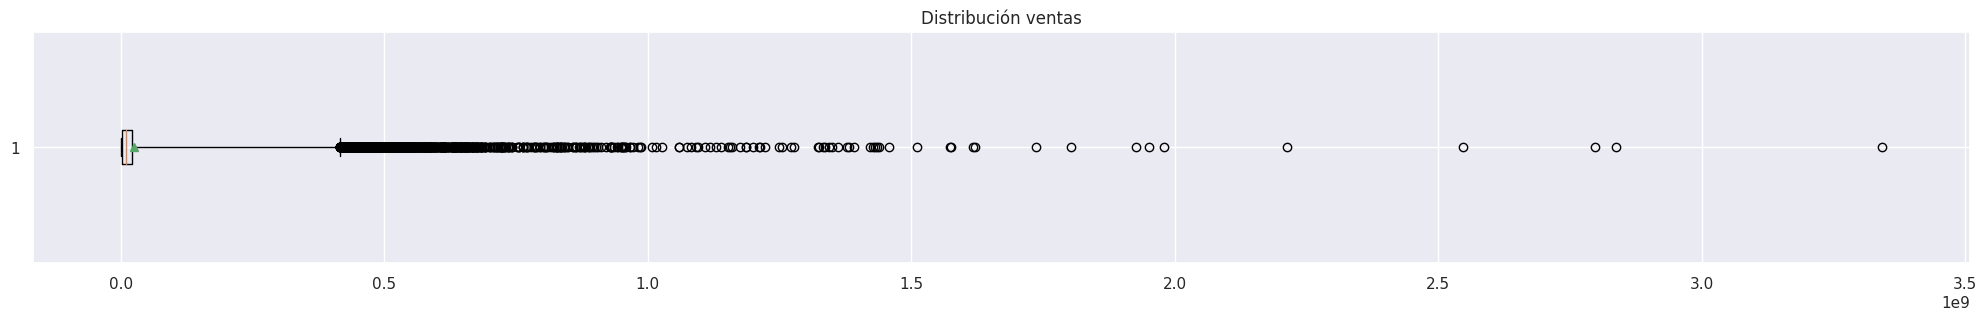

In [ ]:
plt.figure(figsize=(25, 3))
plt.boxplot(dataframe_unificado_final[["ventas"]], whis=[0, 99.5], showmeans=True, vert=False,)
plt.title("Distribución ventas")
plt.show()

In [ ]:
dataframe_unificado_final.shape
dataframe_unificado_final['marca'].value_counts()

marca1     83244
marca3     79301
marca2     22297
marca4     17762
marca9     11174
marca5     10972
marca6      9116
marca7      7944
marca8      2173
marca10     2028
Name: marca, dtype: int64

In [ ]:
percentil_98 = dataframe_unificado_final['ventas'].quantile(0.98)
dataframe_unificado_final = dataframe_unificado_final[dataframe_unificado_final['ventas'] <= percentil_98]

In [ ]:
dataframe_unificado_final.shape
dataframe_unificado_final['marca'].value_counts()

marca1     83244
marca3     74406
marca2     22297
marca4     17762
marca9     11174
marca5     10971
marca6      9112
marca7      7944
marca8      2152
marca10     2028
Name: marca, dtype: int64

In [ ]:
dataframe_unificado_final['hora_entera'] = dataframe_unificado_final['hora_entera'].astype(int)

In [ ]:
dataframe_unificado_final['hora_entera'].unique()
dataframe_unificado_final['ventas'].unique()
dataframe_unificado_final['tienda'].unique()

array(['tienda 1', 'tienda 4', 'tienda 5', 'tienda 6', 'tienda 3',
       'tienda 2', 'tienda 12', 'tienda 11', 'tienda 10 ', 'tienda 9',
       'tienda a', 'tienda b', 'tienda 7', 'tienda 8', 'marca 5',
       'marca 6', 'marca 7', 'marca 8', 'marca 9', 'marca 10'],
      dtype=object)

<p> Se podrían añadir datos de vuelos (despues), ubicacion más especifica del aeropuerto(listo), si hay evento o no en un día o semana (?), clima de cada día(listo) y agrupar categorías (listo). </p>

In [ ]:
dataframe_unificado_final['ubicacion_esp']= np.where((dataframe_unificado_final['tienda']=='tienda 1') |
(dataframe_unificado_final['tienda']=='tienda 3') | (dataframe_unificado_final['tienda']=='tienda 4') |
(dataframe_unificado_final['tienda']=='tienda 4')  | (dataframe_unificado_final['tienda']=='tienda 6'),"A10-A12",
np.where((dataframe_unificado_final['tienda']=='tienda 2'),"A6-A8",
np.where((dataframe_unificado_final['tienda']=='tienda 9') | (dataframe_unificado_final['tienda']=='tienda 10') ,"A2-A4",
np.where((dataframe_unificado_final['tienda']=='marca 7') | (dataframe_unificado_final['tienda']=='marca 5') | (dataframe_unificado_final['tienda']=='marca 6'),"A4",
np.where((dataframe_unificado_final['tienda']=='marca 9') |  (dataframe_unificado_final['tienda']=='marca 10'),"A5-A6",
np.where((dataframe_unificado_final['tienda']=='marca 8') ,"A8-A10",None))))))
ubicacion_esp=pd.get_dummies(dataframe_unificado_final['ubicacion_esp'])
meses_dummies=pd.get_dummies(dataframe_unificado_final['mes_string'])
dataframe_unificado_final=pd.concat([dataframe_unificado_final,ubicacion_esp,meses_dummies],axis=1)

In [ ]:
dataframe_unificado_final['fecha_de_venta']

0        2022-01-01
1        2022-01-01
2        2022-01-01
3        2022-01-01
4        2022-01-01
            ...    
246216   2023-06-30
246217   2023-06-30
246218   2023-06-30
246219   2023-06-30
246220   2023-06-30
Name: fecha_de_venta, Length: 241090, dtype: datetime64[ns]

# Se añade información del clima

In [ ]:
# Se agrega información del clima
info_clima = pd.read_excel(directorio+"weather_data_bogota.xlsx")

In [ ]:
info_clima.info()
info_clima.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13872 entries, 0 to 13871
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13872 non-null  object 
 1   time           13872 non-null  int64  
 2   temperature    13872 non-null  int64  
 3   wind_speed     13872 non-null  int64  
 4   precipitation  13872 non-null  float64
 5   cloud_cover    13872 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 650.4+ KB


,date,time,temperature,wind_speed,precipitation,cloud_cover
0,2022-01-01,0,13,1,0.8,59
1,2022-01-01,100,12,1,0.5,67
2,2022-01-01,200,12,1,0.0,75
3,2022-01-01,300,12,1,0.0,84
4,2022-01-01,400,12,1,0.0,89


In [ ]:
info_clima['date']= pd.to_datetime(info_clima['date'])
info_clima['time']= round(info_clima['time']/100,2)
info_clima['time']= info_clima['time'].astype(int)
info_clima= info_clima.rename(columns={'time':'hora_entera','date':'fecha_de_venta'})
# info_clima =info_clima.drop_duplicates(subset=['fecha_de_venta','hora_entera'],keep='last')

In [ ]:
info_clima['fecha_de_venta']
info_clima.head(5)
info_clima.shape
dataframe_unificado_final.shape

(241090, 299)

In [ ]:
dataframe_unificado_final = dataframe_unificado_final.merge( info_clima, how='left', on=['fecha_de_venta','hora_entera'])
dataframe_unificado_final= dataframe_unificado_final[~dataframe_unificado_final['temperature'].isna()].copy()

In [ ]:
dataframe_unificado_final.shape
dataframe_unificado_final["hora_entera"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

# **Añadir información de los vuelos internacionales**

In [ ]:
# Se agrega información del clima
info_vuelos = pd.read_excel(directorio+"Seguimiento PAX.xlsx")

In [ ]:
info_vuelos.info()
info_vuelos.head()
info_vuelos.describe()
info_vuelos.dtypes
info_vuelos.shape
info_vuelos['Tipo de vuelo'].unique()
info_vuelos["Muelle"].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344146 entries, 0 to 344145
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Aerolinea              344146 non-null  object        
 1   Vuelo de salida        344146 non-null  object        
 2   IATA CODE              344146 non-null  object        
 3   Destino                344146 non-null  object        
 4   Pasajeros saliendo     344146 non-null  int64         
 5   STD                    344146 non-null  object        
 6   Posicion de salida     344072 non-null  object        
 7   Tipo V                 344146 non-null  object        
 8   Tipo de vuelo          344146 non-null  object        
 9   Sala                   344146 non-null  object        
 10  Sala Antigua           344146 non-null  object        
 11  Tipo de aeronave       344146 non-null  object        
 12  ETD                    344040 non-null  obje

array(['D Nacional sur', 'A Internacional oriente', 'C Nacional norte',
       'B Internacional occidente', 'TPA'], dtype=object)

In [ ]:
vuelos_int=info_vuelos[info_vuelos['Tipo de vuelo']=="Internacional"]

In [ ]:
vuelos_int["Muelle"].unique()
vuelos_int.shape[0]
vuelos_int.shape[0]/info_vuelos.shape[0]
vuelos_int["Destino"].unique()
vuelos_int["Destino"].nunique()
vuelos_int["Año"].unique()

array([2020, 2021, 2022, 2023])

In [ ]:
vuelos_int2=vuelos_int[vuelos_int["Año"]>=2022]

In [ ]:
vuelos_int2.shape
vuelos_int2.head()
vuelos_int2['Fecha de salida']
vuelos_int2['Tipo aerolínea'].unique()
vuelos_int2['Tipo aerolínea'].isna().sum()
vuelos_int2.isna().sum()
vuelos_int2["Tipo de aeronave"].unique()

array([789, '32A', 772, '73H', '31B', '32N', 320, 788, '73W', 333, 763,
       319, 332, 359, 343, 752, '73G', 773, '7M8', '32B', '7M9', 733,
       'E90', '32Q', 321, 734, 'CRJ', 'ER4', '77W', '788', 762, '320',
       '789', '319', '333', '763', '359', '734', '332', '343', '772',
       'CNJ', '762', '752', '346', '73C', 'M82', 346], dtype=object)

In [ ]:
vuelos_int3=vuelos_int2.loc[:,["Destino","Pasajeros saliendo","Tipo aerolínea","Hora entera","FECHA DIA","AEROLÍNEA","Fecha de salida"]]

In [ ]:
vuelos_int3.head()
vuelos_int3.isna().sum()

Destino               0
Pasajeros saliendo    0
Tipo aerolínea        1
Hora entera           0
FECHA DIA             0
AEROLÍNEA             1
Fecha de salida       0
dtype: int64

In [ ]:
vuelos_int3.dropna(inplace=True)
vuelos_int3.isna().sum()

Destino               0
Pasajeros saliendo    0
Tipo aerolínea        0
Hora entera           0
FECHA DIA             0
AEROLÍNEA             0
Fecha de salida       0
dtype: int64

In [ ]:
vuelos_int3['Destino'].unique()

array(['Dallas', 'Lima', 'Miami', 'Mexico', 'Nueva York', 'Habana',
       'Ciud. Panamá', 'San Salvador', 'Fort Lauderdale', 'Cancun',
       'Punta Cana', 'Guayaquil', 'Quito', 'Aruba',
       'Curacao - Willemstad', 'San José', 'Orlando', 'Houston',
       'Toronto', 'Atlanta', 'Santiago', 'San Juan Puerto Rico',
       'Guatemala', 'Los Angeles', 'Santo Domingo', 'Barcelona',
       'Estambul', 'Sao Pablo', 'Madrid', 'Buenos aires',
       'Río De Janeiro', 'Frankfurt', 'Washington',
       'Santa Cruz de la Sierra', 'La Paz', 'Asunción', 'Montreal',
       'Bridgetown-Barbados', 'Amsterdam', 'Montevideo', 'Paris',
       'Maturín', 'Cochabamba', 'San Antonio (Texas)', 'Londres',
       'Belo Horizonte (Brasil)', 'Santa Clara (Cuba)',
       'Santiago de los Caballeros', 'Porto Alegre', 'Manaos',
       'Yuma (Arizona)', 'Buenos Aires (2)', 'Balboa', 'Mérida (México)',
       'Harlingen', 'Santo Domingo (La Isabela)', 'Phoenix (EEUU)',
       'Guadalajara', 'Mendoza (Argentina)', '

In [ ]:
vuelos_int3['Destino']=vuelos_int3['Destino'].replace('Buenos Aires (2)', 'Buenos aires')

In [ ]:
vuelos_int3['Destino'].unique()

array(['Dallas', 'Lima', 'Miami', 'Mexico', 'Nueva York', 'Habana',
       'Ciud. Panamá', 'San Salvador', 'Fort Lauderdale', 'Cancun',
       'Punta Cana', 'Guayaquil', 'Quito', 'Aruba',
       'Curacao - Willemstad', 'San José', 'Orlando', 'Houston',
       'Toronto', 'Atlanta', 'Santiago', 'San Juan Puerto Rico',
       'Guatemala', 'Los Angeles', 'Santo Domingo', 'Barcelona',
       'Estambul', 'Sao Pablo', 'Madrid', 'Buenos aires',
       'Río De Janeiro', 'Frankfurt', 'Washington',
       'Santa Cruz de la Sierra', 'La Paz', 'Asunción', 'Montreal',
       'Bridgetown-Barbados', 'Amsterdam', 'Montevideo', 'Paris',
       'Maturín', 'Cochabamba', 'San Antonio (Texas)', 'Londres',
       'Belo Horizonte (Brasil)', 'Santa Clara (Cuba)',
       'Santiago de los Caballeros', 'Porto Alegre', 'Manaos',
       'Yuma (Arizona)', 'Balboa', 'Mérida (México)', 'Harlingen',
       'Santo Domingo (La Isabela)', 'Phoenix (EEUU)', 'Guadalajara',
       'Mendoza (Argentina)', 'Caracas', 'Trujillo 

In [ ]:
vuelos_catego=["Destino","Tipo aerolínea","FECHA DIA","AEROLÍNEA"]
vuelos_encoded = pd.get_dummies(vuelos_int3, columns=vuelos_catego)

In [ ]:
#vuelos_encoded.head()
vuelos_encoded=vuelos_encoded.sort_values(by=['Hora entera', 'Fecha de salida'], ascending=[True, True])

In [ ]:
vuelos_encoded.head(10)

,Pasajeros saliendo,Hora entera,Fecha de salida,Destino_Amsterdam,Destino_Aruba,Destino_Asunción,Destino_Atlanta,Destino_Balboa,Destino_Barcelona,Destino_Belo Horizonte (Brasil),...,AEROLÍNEA_TRANSAEREO S.A.S,AEROLÍNEA_TURKISH AIRLINES,AEROLÍNEA_TURPIAL AIRLINES,AEROLÍNEA_UNITED AIR LINES INC,AEROLÍNEA_VIVA AIRLINES PERU S.A.C SUCURSAL COL,AEROLÍNEA_VIVA COLOMBIA S.A.,AEROLÍNEA_VIVAAEROBUS,AEROLÍNEA_VOLARIS,AEROLÍNEA_VOLARIS COSTA RICA,AEROLÍNEA_WINGO S.A.
112133,273,0,2022-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112426,85,0,2022-01-02,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112427,268,0,2022-01-02,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112768,87,0,2022-01-03,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112769,285,0,2022-01-03,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113121,261,0,2022-01-04,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113122,285,0,2022-01-04,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113470,251,0,2022-01-05,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113472,273,0,2022-01-05,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113473,138,0,2022-01-05,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
vuelos_encoded_agrupado=vuelos_encoded.groupby(['Fecha de salida','Hora entera']).sum().reset_index()

In [ ]:
vuelos_encoded_agrupado.head()
vuelos_encoded_agrupado.shape

(14498, 118)

In [ ]:
vuelos_encoded_agrupado["fecha_de_venta"]=vuelos_encoded_agrupado["Fecha de salida"]
vuelos_encoded_agrupado.rename(columns={'Hora entera': 'hora_entera'}, inplace=True)
dataframe_unificado_final = dataframe_unificado_final.merge( vuelos_encoded_agrupado, how='left', on=['fecha_de_venta','hora_entera'])

In [ ]:
vuelos_encoded_agrupado.iloc[:,:50].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14498 entries, 0 to 14497
Data columns (total 50 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Fecha de salida                      14498 non-null  datetime64[ns]
 1   hora_entera                          14498 non-null  int64         
 2   Pasajeros saliendo                   14498 non-null  int64         
 3   Destino_Amsterdam                    14498 non-null  uint8         
 4   Destino_Aruba                        14498 non-null  uint8         
 5   Destino_Asunción                     14498 non-null  uint8         
 6   Destino_Atlanta                      14498 non-null  uint8         
 7   Destino_Balboa                       14498 non-null  uint8         
 8   Destino_Barcelona                    14498 non-null  uint8         
 9   Destino_Belo Horizonte (Brasil)      14498 non-null  uint8         
 10  Destino_Bo

In [ ]:
vuelos_encoded_agrupado.iloc[:,51:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14498 entries, 0 to 14497
Data columns (total 68 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Destino_Río De Janeiro                             14498 non-null  uint8         
 1   Destino_San Antonio (Texas)                        14498 non-null  uint8         
 2   Destino_San José                                   14498 non-null  uint8         
 3   Destino_San Juan Puerto Rico                       14498 non-null  uint8         
 4   Destino_San Salvador                               14498 non-null  uint8         
 5   Destino_Santa Clara (Cuba)                         14498 non-null  uint8         
 6   Destino_Santa Cruz de la Sierra                    14498 non-null  uint8         
 7   Destino_Santiago                                   14498 non-null  uint8         
 8   Destino_Santiago

# Reducción de variables categóricas

In [ ]:
dataframe_unificado_final['viaje_ejecutivo_negocio'] = dataframe_unificado_final['travel & business femenino'] + dataframe_unificado_final['travel & business masculino'] + dataframe_unificado_final['articulos de viaje'] + dataframe_unificado_final['linea de viaje'] + dataframe_unificado_final['linea ejecutiva']+ dataframe_unificado_final['aerpos']+  dataframe_unificado_final['oficina'] + dataframe_unificado_final['escritorio']
dataframe_unificado_final['tabaco_alcohol'] = dataframe_unificado_final['vicios']
dataframe_unificado_final= dataframe_unificado_final.drop(columns=['sin asignar sin asignar',''],axis=1)
dataframe_unificado_final['accesorios'] = dataframe_unificado_final['accesorio']+ dataframe_unificado_final['accesorios']+ dataframe_unificado_final['porta pasaporte'] + dataframe_unificado_final['portadocumentos']
dataframe_unificado_final['regalos_obsequios'] = dataframe_unificado_final['souvenirs'] + dataframe_unificado_final['textiles de regalo']+dataframe_unificado_final['obsequio']+ dataframe_unificado_final['llavero']
dataframe_unificado_final['artesanias']= dataframe_unificado_final['artesanias']+ dataframe_unificado_final['tejido']+ dataframe_unificado_final['pulsera']+dataframe_unificado_final['brazelete']
dataframe_unificado_final['calzado'] = dataframe_unificado_final['calzado']+ dataframe_unificado_final['zapato']+ dataframe_unificado_final['mocasin']+ dataframe_unificado_final['sandalia']+ dataframe_unificado_final['tacon']+ dataframe_unificado_final['calzado femenino']+dataframe_unificado_final['calzado masculino']
dataframe_unificado_final['accesorios_de_mano']= dataframe_unificado_final['bolsos femenino']+ dataframe_unificado_final['bolsos masculino']+ dataframe_unificado_final['riñonera']+dataframe_unificado_final['cartuchera']+dataframe_unificado_final['maleta']+dataframe_unificado_final['cruzado']+dataframe_unificado_final['morral']+dataframe_unificado_final['bolso'] +dataframe_unificado_final['canguro'] + dataframe_unificado_final['billetera']+ dataframe_unificado_final['monedero']+ dataframe_unificado_final['hebilla']+dataframe_unificado_final['correa']+ dataframe_unificado_final['cinturones femenino']+dataframe_unificado_final['cinturones masculino']+dataframe_unificado_final['lederter band']+dataframe_unificado_final['maleta de viaje']+dataframe_unificado_final['cinturon']+dataframe_unificado_final['bolso de viaje']+dataframe_unificado_final['carriel']+dataframe_unificado_final['tarjetero']+dataframe_unificado_final['estuche']
dataframe_unificado_final['accesorios_belleza_cuidado'] =dataframe_unificado_final['cuidado personal']+dataframe_unificado_final['cosmetiquero']+dataframe_unificado_final['limpiador']+dataframe_unificado_final['neceser']+dataframe_unificado_final['bienestar femenino']+dataframe_unificado_final['bienestar masculino']+dataframe_unificado_final['bienestar unisex']
dataframe_unificado_final['prendas_vestir'] =  dataframe_unificado_final['textiles de playa'] + dataframe_unificado_final['chaqueta']+ dataframe_unificado_final['chal']+ dataframe_unificado_final['tula herencia']+ dataframe_unificado_final['prenda'] + dataframe_unificado_final['ruana'] + dataframe_unificado_final['shoulder'] + dataframe_unificado_final['camiseta'] + dataframe_unificado_final['capa'] + dataframe_unificado_final['camiseta'] + dataframe_unificado_final['capa'] + dataframe_unificado_final['faja de seguridad']+ dataframe_unificado_final['cardigan'] + dataframe_unificado_final['prendas de vestir femenino'] + dataframe_unificado_final['prendas de vestir masculino'] + dataframe_unificado_final['tira']+ dataframe_unificado_final['media'] + dataframe_unificado_final['tapaboca'] + dataframe_unificado_final['gafa']
dataframe_unificado_final['prendas_vestir_cabeza'] = dataframe_unificado_final['gorra'] + dataframe_unificado_final['pañoleta']+ dataframe_unificado_final['gorra beisbolera']+ dataframe_unificado_final['sombrero']+ dataframe_unificado_final['aguadeño']
dataframe_unificado_final['lujo'] = dataframe_unificado_final['joya'] + dataframe_unificado_final['esmeralda'] + dataframe_unificado_final['lujo']+ dataframe_unificado_final['joyeria'] + dataframe_unificado_final['perfumería']+ dataframe_unificado_final['fragancia']+dataframe_unificado_final['accesorios de lujo femenino']+dataframe_unificado_final['accesorios de lujo masculino']
dataframe_unificado_final['marroquineria'] = dataframe_unificado_final['marroquineria']+ dataframe_unificado_final['marroquinería femenino']+ dataframe_unificado_final['marroquinería masculino']
dataframe_unificado_final['cafe'] = dataframe_unificado_final['cafe']+ dataframe_unificado_final['complementos cafe']
dataframe_unificado_final['tecnologia'] = dataframe_unificado_final['tecnologia']+ dataframe_unificado_final['porta pc'] + dataframe_unificado_final['manos libres']
dataframe_unificado_final['libros_revistas_papel']= dataframe_unificado_final['libros']+dataframe_unificado_final['libro']+ dataframe_unificado_final['revistas y periodicos']+ dataframe_unificado_final['productos de papel']+dataframe_unificado_final['papelera']
dataframe_unificado_final['cosas_hogar']= dataframe_unificado_final['baul'] + dataframe_unificado_final['casa hogar']+ dataframe_unificado_final['almohada']
dataframe_unificado_final['comida_galguerias']= dataframe_unificado_final['alimentos y bebidas retail'] + dataframe_unificado_final['golosinas']+ dataframe_unificado_final['comida']+ dataframe_unificado_final['alimento']+ dataframe_unificado_final['suspiro']+ dataframe_unificado_final['reposteria dulce']

In [ ]:
dataframe_unificado_final= dataframe_unificado_final.drop(columns=['papelera','productos de papel','revistas y periodicos','libro','libros','manos libres','porta pc','tecnologia',
'complementos cafe','marroquinería masculino','marroquinería femenino','accesorios de lujo masculino','accesorios de lujo femenino','fragancia','perfumería',
'joyeria','esmeralda','joya','sombrero','aguadeño','gorra beisbolera','pañoleta','gorra','gafa','tapaboca','media','tira','prendas de vestir masculino','prendas de vestir femenino',
'cardigan','faja de seguridad','capa','camiseta','shoulder','ruana','prenda','tula herencia','chal','chaqueta','textiles de playa','bienestar unisex','bienestar masculino','bienestar femenino','neceser',
'limpiador','cosmetiquero','cuidado personal','estuche','tarjetero','carriel','bolso de viaje','cinturon','maleta de viaje','lederter band','cinturones masculino','cinturones femenino',
'correa','hebilla','monedero','billetera','canguro','bolso','morral','cruzado','maleta','cartuchera','riñonera','bolsos masculino','bolsos femenino','tacon','sandalia','mocasin','zapato',
'calzado masculino','calzado femenino','tejido','pulsera','brazelete','llavero','obsequio','textiles de regalo','souvenirs','vicios','articulos de viaje','linea de viaje','portadocumentos',
'porta pasaporte','accesorio','reposteria dulce','suspiro','alimento','comida','golosinas','alimentos y bebidas retail','escritorio','oficina','aerpos','linea ejecutiva','linea de viaje','articulos de viaje',
'travel & business femenino', 'travel & business masculino','almohada','casa hogar','baul'])

In [ ]:
dataframe_unificado_final.shape

(240436, 325)

# División de dataframes

In [ ]:
dataframe_unificado_final.iloc[:,164:186].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240436 entries, 0 to 240435
Data columns (total 22 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   A10-A12    240436 non-null  uint8
 1   A2-A4      240436 non-null  uint8
 2   A4         240436 non-null  uint8
 3   A5-A6      240436 non-null  uint8
 4   A6-A8      240436 non-null  uint8
 5   A8-A10     240436 non-null  uint8
 6   April      240436 non-null  uint8
 7   August     240436 non-null  uint8
 8   December   240436 non-null  uint8
 9   February   240436 non-null  uint8
 10  January    240436 non-null  uint8
 11  July       240436 non-null  uint8
 12  June       240436 non-null  uint8
 13  March      240436 non-null  uint8
 14  May        240436 non-null  uint8
 15  November   240436 non-null  uint8
 16  October    240436 non-null  uint8
 17  September  240436 non-null  uint8
 18  abril      240436 non-null  uint8
 19  agosto     240436 non-null  uint8
 20  diciembre  240436 non-null

In [ ]:
dataframe_unificado_final_solo_marca_categorias=dataframe_unificado_final[(dataframe_unificado_final['marca']=="marca3") | (dataframe_unificado_final['marca']=="marca4")
| (dataframe_unificado_final['marca']=="marca5") | (dataframe_unificado_final['marca']=="marca6") | (dataframe_unificado_final['marca']=="marca10")].reset_index(drop=True).copy()
dataframe_unificado_final_sin_categorias= pd.concat([dataframe_unificado_final.iloc[:,:13].reset_index(drop=True).copy(),dataframe_unificado_final.iloc[:,164:186].reset_index(drop=True).copy()],axis=1).reset_index(drop=True).copy()

In [ ]:
dataframe_unificado_final_solo_marca_categorias.columns

Index(['fecha_de_venta', 'tienda', 'ventas', 'muelle', 'hora_entera',
       'transacciones', 'semana', 'anio_entero', 'mes_entero', 'dia_entero',
       ...
       'viaje_ejecutivo_negocio', 'tabaco_alcohol', 'regalos_obsequios',
       'accesorios_de_mano', 'accesorios_belleza_cuidado', 'prendas_vestir',
       'prendas_vestir_cabeza', 'libros_revistas_papel', 'cosas_hogar',
       'comida_galguerias'],
      dtype='object', length=325)

In [ ]:
dataframe_unificado_final_solo_marca_categorias.iloc[:,200:250].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114279 entries, 0 to 114278
Data columns (total 50 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Destino_Amsterdam                    106859 non-null  float64
 1   Destino_Aruba                        106859 non-null  float64
 2   Destino_Asunción                     106859 non-null  float64
 3   Destino_Atlanta                      106859 non-null  float64
 4   Destino_Balboa                       106859 non-null  float64
 5   Destino_Barcelona                    106859 non-null  float64
 6   Destino_Belo Horizonte (Brasil)      106859 non-null  float64
 7   Destino_Boston                       106859 non-null  float64
 8   Destino_Bridgetown-Barbados          106859 non-null  float64
 9   Destino_Buenos aires                 106859 non-null  float64
 10  Destino_Cancun                       106859 non-null  float64
 11  Destino_Carac

In [ ]:
dataframe_unificado_final_solo_marca_categorias.to_csv("unificado_final.csv")

In [ ]:
dataframe_unificado_final_solo_marca_categorias

,fecha_de_venta,tienda,ventas,muelle,hora_entera,transacciones,semana,anio_entero,mes_entero,dia_entero,...,viaje_ejecutivo_negocio,tabaco_alcohol,regalos_obsequios,accesorios_de_mano,accesorios_belleza_cuidado,prendas_vestir,prendas_vestir_cabeza,libros_revistas_papel,cosas_hogar,comida_galguerias
0,2022-01-01,tienda 1,157818326.0,None,6,34.0,52.0,2022.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-01-01,tienda 1,120266134.6,None,7,26.0,52.0,2022.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2022-01-01,tienda 1,18215139.6,None,8,8.0,52.0,2022.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-01-01,tienda 1,24501991.4,None,9,8.0,52.0,2022.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-01-01,tienda 1,123980078.8,None,10,23.0,52.0,2022.0,1.0,1.0,...,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114274,2023-06-30,marca 10,7998400.0,None,10,1.0,26.0,2023.0,6.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114275,2023-06-30,marca 10,5756800.0,None,12,2.0,26.0,2023.0,6.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114276,2023-06-30,marca 10,3698000.0,None,14,1.0,26.0,2023.0,6.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114277,2023-06-30,marca 10,3198400.0,None,15,1.0,26.0,2023.0,6.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dataframe_unificado_final_solo_marca_categorias.to_excel('archivo_consolidado.xlsx', index=False)

KeyboardInterrupt: ignored

In [ ]:
dataframe_unificado_final_solo_marca_categorias.shape

In [ ]:
test=dataframe_unificado_final_solo_marca_categorias.isna().sum()

In [ ]:
test.shape

In [ ]:
test[test>0].iloc[:50]

In [ ]:
dataframe_unificado_final_solo_marca_categorias.shape

In [ ]:
dataframe_unificado_final_solo_marca_categorias.iloc[0:10].head()

In [ ]:
df_final= dataframe_unificado_final_solo_marca_categorias.drop(columns=['unidades','transacciones','muelle','fecha_de_venta','mes_string','tienda','marca','descripcion','objeto1','objeto2','objeto3','objeto4','objeto5','tipo_de_tienda','ubicacion_esp','ventas_sin_iva','precio_bruto_total','impuesto_total','descuento_total','tienda a','tienda b','personas_que_ingresan','Fecha de salida'])

In [ ]:
test2=df_final.isna().sum()

In [ ]:
#test2=df_final.isna().sum()
test2[test2>0].iloc[:50]

In [ ]:
df_final.dropna(inplace=True)

In [ ]:
test3=df_final.isna().sum()
test3[test3>0].iloc[:50]

# Análisis de las categorías y el dataframe resultante

In [ ]:
df_final.describe()

,ventas,hora_entera,semana,anio_entero,mes_entero,dia_entero,accesorios,juegos y juguetes,lujo,miscelanea,...,viaje_ejecutivo_negocio,tabaco_alcohol,regalos_obsequios,accesorios_de_mano,accesorios_belleza_cuidado,prendas_vestir,prendas_vestir_cabeza,libros_revistas_papel,cosas_hogar,comida_galguerias
count,1.142790e+05,114279.000000,114279.000000,114279.000000,114279.000000,114279.00000,114279.000000,114279.000000,114279.000000,114279.000000,...,114279.000000,114279.000000,114279.000000,114279.000000,114279.000000,114279.000000,114279.000000,114279.000000,114279.000000,114279.000000
mean,2.439605e+07,12.961813,23.273121,2022.336221,5.772049,15.80797,0.015970,0.119996,1.037085,0.000954,...,0.063039,0.424059,2.050762,0.114562,0.222639,0.069558,0.000333,0.263916,0.001750,5.574349
std,4.013423e+07,6.044854,14.165454,0.472418,3.240928,8.79662,0.125777,0.412992,2.608141,0.030869,...,0.284410,0.737798,5.170436,0.448587,0.613815,0.294303,0.018706,0.715688,0.041798,16.649746
min,0.000000e+00,0.000000,1.000000,2022.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.749163e+06,8.000000,12.000000,2022.000000,3.000000,8.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.160000e+06,13.000000,22.000000,2022.000000,5.000000,16.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.478261e+07,18.000000,34.000000,2023.000000,8.000000,23.00000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.359381e+08,23.000000,52.000000,2023.000000,12.000000,31.00000,2.000000,13.000000,57.000000,1.000000,...,7.000000,14.000000,79.000000,8.000000,10.000000,4.000000,2.000000,20.000000,1.000000,205.000000


In [ ]:
df_final.shape

(114279, 302)

In [ ]:
target=["ventas"]
temporal=["hora_entera","semana","anio_entero","dia_entero","April","August","February","January","July","June","March","May","November","October","September","December","abril","agosto","diciembre","enero","febrero","julio","junio","marzo","mayo","noviembre","octubre","septiembre","FECHA DIA_domingo","FECHA DIA_jueves","FECHA DIA_lunes","FECHA DIA_martes","FECHA DIA_miércoles","FECHA DIA_sábado","FECHA DIA_viernes"]
catego=["accesorios","juegos y juguetes","lujo","miscelanea","artesanias","cafe","calzado","botella","cambio","marroquineria","productos comerciali unisex","viaje_ejecutivo_negocio","tabaco_alcohol","regalos_obsequios","accesorios_de_mano","accesorios_belleza_cuidado","prendas_vestir","prendas_vestir_cabeza","libros_revistas_papel","cosas_hogar","comida_galguerias"]
catego2=['categoria 1','categoria 2','categoria 3','categoria 4','categoria 5','categoria 6','categoria 7','categoria 8','categoria 9','categoria 10','categoria 11','categoria 12','categoria 13','categoria 14','categoria 15','categoria 16','categoria 17','categoria 18','categoria 19','categoria 20','categoria 21','categoria 22','categoria 23','categoria 24','categoria 25','categoria 26','categoria 27','categoria 28','categoria 29','categoria 30','categoria 31','categoria 32','categoria 33','categoria 34','categoria 35','categoria 36','categoria 37','categoria 38','categoria 39','categoria 40','categoria 41','categoria 42','categoria 43','categoria 44','categoria 45','categoria 46','categoria 47','categoria 48','categoria 49','categoria 50','categoria 51','categoria 52','categoria 53','categoria 54','categoria 55','categoria 56','categoria 57','categoria 58','categoria 59','categoria 60','categoria 61','categoria 62','categoria 63','categoria 64','categoria 65','categoria 66','categoria 67','categoria 68','categoria 69','categoria 70','categoria 71','categoria 72','categoria 73','categoria 74','categoria 75','categoria 76','categoria 77','categoria 78','categoria 79','categoria 80','categoria 81','categoria 82','categoria 83','categoria 84','categoria 85','categoria 86','categoria 87','categoria 88','categoria 89','categoria 90','categoria 91','categoria 92','categoria 93','categoria 94','categoria 95','categoria 96','categoria 97','categoria 98','categoria 99','categoria 100','categoria 101','categoria 102','categoria 103']


In [ ]:
df_final.iloc[:,:51].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114279 entries, 0 to 114278
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ventas                       114279 non-null  float64
 1   hora_entera                  114279 non-null  int64  
 2   semana                       114279 non-null  float64
 3   anio_entero                  114279 non-null  float64
 4   mes_entero                   114279 non-null  float64
 5   dia_entero                   114279 non-null  float64
 6   accesorios                   114279 non-null  float64
 7   juegos y juguetes            114279 non-null  float64
 8   lujo                         114279 non-null  float64
 9   miscelanea                   114279 non-null  float64
 10  artesanias                   114279 non-null  float64
 11  cafe                         114279 non-null  float64
 12  calzado                      114279 non-null  float64
 13 

In [ ]:
df_final.iloc[:,51:100].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114279 entries, 0 to 114278
Data columns (total 49 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   categoria 37  114279 non-null  float64
 1   categoria 38  114279 non-null  float64
 2   categoria 39  114279 non-null  float64
 3   categoria 4   114279 non-null  float64
 4   categoria 40  114279 non-null  float64
 5   categoria 41  114279 non-null  float64
 6   categoria 42  114279 non-null  float64
 7   categoria 43  114279 non-null  float64
 8   categoria 44  114279 non-null  float64
 9   categoria 45  114279 non-null  float64
 10  categoria 46  114279 non-null  float64
 11  categoria 47  114279 non-null  float64
 12  categoria 48  114279 non-null  float64
 13  categoria 49  114279 non-null  float64
 14  categoria 5   114279 non-null  float64
 15  categoria 50  114279 non-null  float64
 16  categoria 51  114279 non-null  float64
 17  categoria 52  114279 non-null  float64
 18  cate

In [ ]:
df_final.iloc[:,100:150].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114279 entries, 0 to 114278
Data columns (total 50 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   categoria 81  114279 non-null  float64
 1   categoria 82  114279 non-null  float64
 2   categoria 83  114279 non-null  float64
 3   categoria 84  114279 non-null  float64
 4   categoria 85  114279 non-null  float64
 5   categoria 86  114279 non-null  float64
 6   categoria 87  114279 non-null  float64
 7   categoria 88  114279 non-null  float64
 8   categoria 89  114279 non-null  float64
 9   categoria 9   114279 non-null  float64
 10  categoria 90  114279 non-null  float64
 11  categoria 91  114279 non-null  float64
 12  categoria 92  114279 non-null  float64
 13  categoria 93  114279 non-null  float64
 14  categoria 94  114279 non-null  float64
 15  categoria 95  114279 non-null  float64
 16  categoria 96  114279 non-null  float64
 17  categoria 97  114279 non-null  float64
 18  cate

In [ ]:
marca=["marca1","marca2","marca3","marca4","marca5","marca6","marca7","marca8","marca9","marca10"]
tienda=["tienda 1","tienda 10","tienda 11","tienda 12","tienda 2","tienda 3","tienda 4","tienda 5","tienda 6","tienda 7","tienda 8","tienda 9"]
Ubicacion=["A10-A12","A2-A4","A4","A5-A6","A6-A8","A8-A10"]
numerica=["temperature","wind_speed","precipitation","cloud_cover","Pasajeros saliendo"]



In [ ]:
df_final.iloc[:,150:200].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114279 entries, 0 to 114278
Data columns (total 50 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   December                         114279 non-null  uint8  
 1   February                         114279 non-null  uint8  
 2   January                          114279 non-null  uint8  
 3   July                             114279 non-null  uint8  
 4   June                             114279 non-null  uint8  
 5   March                            114279 non-null  uint8  
 6   May                              114279 non-null  uint8  
 7   November                         114279 non-null  uint8  
 8   October                          114279 non-null  uint8  
 9   September                        114279 non-null  uint8  
 10  abril                            114279 non-null  uint8  
 11  agosto                           114279 non-null  uint8  
 12  di

In [ ]:
clima=["temperature","wind_speed","precipitation","cloud_cover"]
Destino=["Destino_Amsterdam","Destino_Aruba","Destino_Asunción","Destino_Atlanta","Destino_Balboa","Destino_Barcelona","Destino_Belo Horizonte (Brasil)","Destino_Boston","Destino_Bridgetown-Barbados","Destino_Buenos aires","Destino_Cancun","Destino_Caracas","Destino_Ciud. Panamá","Destino_Cochabamba","Destino_Curacao - Willemstad","Destino_Dallas","Destino_Estambul","Destino_Fort Lauderdale","Destino_Frankfurt","Destino_Guadalajara","Destino_Guatemala","Destino_Guayaquil","Destino_Habana","Destino_Harlingen","Destino_Houston","Destino_La Paz","Destino_La Romana (Rep. Dominicana)","Destino_Lima","Destino_Londres","Destino_Los Angeles","Destino_Madrid","Destino_Manaos","Destino_Maturín","Destino_Mendoza (Argentina)","Destino_Mexico","Destino_Miami","Destino_Monterrey","Destino_Montevideo","Destino_Montreal","Destino_Mérida (México)","Destino_Nueva York","Destino_Orlando","Destino_Paris","Destino_Phoenix (EEUU)","Destino_Phoenix-Mesa (Arizona)","Destino_Porto Alegre","Destino_Punta Cana","Destino_Quito","Destino_Río De Janeiro","Destino_San Antonio (Texas)","Destino_San José","Destino_San Juan Puerto Rico","Destino_San Salvador","Destino_Santa Clara (Cuba)","Destino_Santa Cruz de la Sierra","Destino_Santiago","Destino_Santiago de los Caballeros","Destino_Santo Domingo","Destino_Santo Domingo (La Isabela)","Destino_Sao Pablo","Destino_Toronto","Destino_Trujillo (Perú)","Destino_Washington","Destino_Yuma (Arizona)"]

In [ ]:
df_final.iloc[:,200:250].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114279 entries, 0 to 114278
Data columns (total 50 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Destino_Harlingen                    106859 non-null  float64
 1   Destino_Houston                      106859 non-null  float64
 2   Destino_La Paz                       106859 non-null  float64
 3   Destino_La Romana (Rep. Dominicana)  106859 non-null  float64
 4   Destino_Lima                         106859 non-null  float64
 5   Destino_Londres                      106859 non-null  float64
 6   Destino_Los Angeles                  106859 non-null  float64
 7   Destino_Madrid                       106859 non-null  float64
 8   Destino_Manaos                       106859 non-null  float64
 9   Destino_Maturín                      106859 non-null  float64
 10  Destino_Mendoza (Argentina)          106859 non-null  float64
 11  Destino_Mexic

In [ ]:
aerolinea=["Tipo aerolínea_Charter","Tipo aerolínea_Legacy","Tipo aerolínea_Low Cost","Tipo aerolínea_Regional"]

In [ ]:
df_final.iloc[:,250:300].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114279 entries, 0 to 114278
Data columns (total 50 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   FECHA DIA_sábado                                   106859 non-null  float64
 1   FECHA DIA_viernes                                  106859 non-null  float64
 2   AEROLÍNEA_AEROLINEAS ARGENTINAS  S.A.              106859 non-null  float64
 3   AEROLÍNEA_AEROLÍNEA DE VUELO CHARTER               106859 non-null  float64
 4   AEROLÍNEA_AEROMEXICO S.A.                          106859 non-null  float64
 5   AEROLÍNEA_AIR CANADA S.A.                          106859 non-null  float64
 6   AEROLÍNEA_AIR EUROPA                               106859 non-null  float64
 7   AEROLÍNEA_AIR FRANCE                               106859 non-null  float64
 8   AEROLÍNEA_AMERICAN AIRLINES INC.                   106859 non-null  float6

In [ ]:
aerolinea=["AEROLÍNEA_AEROLINEAS ARGENTINAS  S.A.","AEROLÍNEA_AEROLÍNEA DE VUELO CHARTER","AEROLÍNEA_AEROMEXICO S.A.","AEROLÍNEA_AIR CANADA S.A.","AEROLÍNEA_AIR EUROPA","AEROLÍNEA_AIR FRANCE","AEROLÍNEA_AMERICAN AIRLINES INC.","AEROLÍNEA_ARAJET","AEROLÍNEA_AVIANCA S.A","AEROLÍNEA_AZUL BRAZILIAN AIRLINES","AEROLÍNEA_COPA AIRLINES S.A.","AEROLÍNEA_DELTA AIR LINES INC.","AEROLÍNEA_GLOBAL REPS LTDA","AEROLÍNEA_IBERIA S.A.","AEROLÍNEA_ITA Transportes Aéreos","AEROLÍNEA_JET MAGIC","AEROLÍNEA_JETBLUE AIRWAYS CORPORATION","AEROLÍNEA_JETSMART AIRLINES SPA SUCURSAL COLOMBIA","AEROLÍNEA_KLM CIA","AEROLÍNEA_LATAM AIRLINES","AEROLÍNEA_LINEA AEREA DE SERVICIO EJECUTIVO LASER","AEROLÍNEA_LUFTHANSA S.A.","AEROLÍNEA_MENZIES AVIATION COLOMBIA S.A.S","AEROLÍNEA_PLUS ULTRA LÍNEAS AÉREAS","AEROLÍNEA_SAI S.A.","AEROLÍNEA_SATENA","AEROLÍNEA_SKY AIRLINES","AEROLÍNEA_SKY CANA","AEROLÍNEA_SPIRIT AIRLINES INC","AEROLÍNEA_TITAN AIRWAYS","AEROLÍNEA_TRANSAEREO S.A.S","AEROLÍNEA_TURKISH AIRLINES","AEROLÍNEA_TURPIAL AIRLINES","AEROLÍNEA_UNITED AIR LINES INC","AEROLÍNEA_VIVA AIRLINES PERU S.A.C SUCURSAL COL","AEROLÍNEA_VIVA COLOMBIA S.A.","AEROLÍNEA_VIVAAEROBUS","AEROLÍNEA_VOLARIS","AEROLÍNEA_VOLARIS COSTA RICA","AEROLÍNEA_WINGO S.A."]


In [ ]:
df_final.iloc[:,299:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114279 entries, 0 to 114278
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   libros_revistas_papel  114279 non-null  float64
 1   cosas_hogar            114279 non-null  float64
 2   comida_galguerias      114279 non-null  float64
dtypes: float64(3)
memory usage: 2.6 MB


In [ ]:
target="ventas"
temporal=["hora_entera","semana","anio_entero","dia_entero","April","August","February","January","July","June","March","May","November","October","September","December","abril","agosto","diciembre","enero","febrero","julio","junio","marzo","mayo","noviembre","octubre","septiembre","FECHA DIA_domingo","FECHA DIA_jueves","FECHA DIA_lunes","FECHA DIA_martes","FECHA DIA_miércoles","FECHA DIA_sábado","FECHA DIA_viernes"]
catego=["accesorios","juegos y juguetes","lujo","miscelanea","artesanias","cafe","calzado","botella","cambio","marroquineria","productos comerciali unisex","viaje_ejecutivo_negocio","tabaco_alcohol","regalos_obsequios","accesorios_de_mano","accesorios_belleza_cuidado","prendas_vestir","prendas_vestir_cabeza","libros_revistas_papel","cosas_hogar","comida_galguerias"]
catego2=['categoria 1','categoria 2','categoria 3','categoria 4','categoria 5','categoria 6','categoria 7','categoria 8','categoria 9','categoria 10','categoria 11','categoria 12','categoria 13','categoria 14','categoria 15','categoria 16','categoria 17','categoria 18','categoria 19','categoria 20','categoria 21','categoria 22','categoria 23','categoria 24','categoria 25','categoria 26','categoria 27','categoria 28','categoria 29','categoria 30','categoria 31','categoria 32','categoria 33','categoria 34','categoria 35','categoria 36','categoria 37','categoria 38','categoria 39','categoria 40','categoria 41','categoria 42','categoria 43','categoria 44','categoria 45','categoria 46','categoria 47','categoria 48','categoria 49','categoria 50','categoria 51','categoria 52','categoria 53','categoria 54','categoria 55','categoria 56','categoria 57','categoria 58','categoria 59','categoria 60','categoria 61','categoria 62','categoria 63','categoria 64','categoria 65','categoria 66','categoria 67','categoria 68','categoria 69','categoria 70','categoria 71','categoria 72','categoria 73','categoria 74','categoria 75','categoria 76','categoria 77','categoria 78','categoria 79','categoria 80','categoria 81','categoria 82','categoria 83','categoria 84','categoria 85','categoria 86','categoria 87','categoria 88','categoria 89','categoria 90','categoria 91','categoria 92','categoria 93','categoria 94','categoria 95','categoria 96','categoria 97','categoria 98','categoria 99','categoria 100','categoria 101','categoria 102','categoria 103']
marca=["marca1","marca2","marca3","marca4","marca5","marca6","marca7","marca8","marca9","marca10"]
tienda=["tienda 1","tienda 10","tienda 11","tienda 12","tienda 2","tienda 3","tienda 4","tienda 5","tienda 6","tienda 7","tienda 8","tienda 9"]
ubicacion=["A10-A12","A2-A4","A4","A5-A6","A6-A8","A8-A10"]
clima=["temperature","wind_speed","precipitation","cloud_cover"]
destino=["Destino_Amsterdam","Destino_Aruba","Destino_Asunción","Destino_Atlanta","Destino_Balboa","Destino_Barcelona","Destino_Belo Horizonte (Brasil)","Destino_Boston","Destino_Bridgetown-Barbados","Destino_Buenos aires","Destino_Cancun","Destino_Caracas","Destino_Ciud. Panamá","Destino_Cochabamba","Destino_Curacao - Willemstad","Destino_Dallas","Destino_Estambul","Destino_Fort Lauderdale","Destino_Frankfurt","Destino_Guadalajara","Destino_Guatemala","Destino_Guayaquil","Destino_Habana","Destino_Harlingen","Destino_Houston","Destino_La Paz","Destino_La Romana (Rep. Dominicana)","Destino_Lima","Destino_Londres","Destino_Los Angeles","Destino_Madrid","Destino_Manaos","Destino_Maturín","Destino_Mendoza (Argentina)","Destino_Mexico","Destino_Miami","Destino_Monterrey","Destino_Montevideo","Destino_Montreal","Destino_Mérida (México)","Destino_Nueva York","Destino_Orlando","Destino_Paris","Destino_Phoenix (EEUU)","Destino_Phoenix-Mesa (Arizona)","Destino_Porto Alegre","Destino_Punta Cana","Destino_Quito","Destino_Río De Janeiro","Destino_San Antonio (Texas)","Destino_San José","Destino_San Juan Puerto Rico","Destino_San Salvador","Destino_Santa Clara (Cuba)","Destino_Santa Cruz de la Sierra","Destino_Santiago","Destino_Santiago de los Caballeros","Destino_Santo Domingo","Destino_Santo Domingo (La Isabela)","Destino_Sao Pablo","Destino_Toronto","Destino_Trujillo (Perú)","Destino_Washington","Destino_Yuma (Arizona)"]
tipo_aerolinea=["Tipo aerolínea_Charter","Tipo aerolínea_Legacy","Tipo aerolínea_Low Cost","Tipo aerolínea_Regional"]
#aerolinea=["AEROLÍNEA_AEROLINEAS ARGENTINAS  S.A.","AEROLÍNEA_AEROLÍNEA DE VUELO CHARTER","AEROLÍNEA_AEROMEXICO S.A.","AEROLÍNEA_AIR CANADA S.A.","AEROLÍNEA_AIR EUROPA","AEROLÍNEA_AIR FRANCE","AEROLÍNEA_AMERICAN AIRLINES INC.","AEROLÍNEA_ARAJET","AEROLÍNEA_AVIANCA S.A","AEROLÍNEA_AZUL BRAZILIAN AIRLINES","AEROLÍNEA_COPA AIRLINES S.A.","AEROLÍNEA_DELTA AIR LINES INC.","AEROLÍNEA_GLOBAL REPS LTDA","AEROLÍNEA_IBERIA S.A.","AEROLÍNEA_ITA Transportes Aéreos","AEROLÍNEA_JET MAGIC","AEROLÍNEA_JETBLUE AIRWAYS CORPORATION","AEROLÍNEA_JETSMART AIRLINES SPA SUCURSAL COLOMBIA","AEROLÍNEA_KLM CIA","AEROLÍNEA_LATAM AIRLINES","AEROLÍNEA_LINEA AEREA DE SERVICIO EJECUTIVO LASER","AEROLÍNEA_LUFTHANSA S.A.","AEROLÍNEA_MENZIES AVIATION COLOMBIA S.A.S","AEROLÍNEA_PLUS ULTRA LÍNEAS AÉREAS","AEROLÍNEA_SAI S.A.","AEROLÍNEA_SATENA","AEROLÍNEA_SKY AIRLINES","AEROLÍNEA_SKY CANA","AEROLÍNEA_SPIRIT AIRLINES INC","AEROLÍNEA_TITAN AIRWAYS","AEROLÍNEA_TRANSAEREO S.A.S","AEROLÍNEA_TURKISH AIRLINES","AEROLÍNEA_TURPIAL AIRLINES","AEROLÍNEA_UNITED AIR LINES INC","AEROLÍNEA_VIVA AIRLINES PERU S.A.C SUCURSAL COL","AEROLÍNEA_VIVA COLOMBIA S.A.","AEROLÍNEA_VIVAAEROBUS","AEROLÍNEA_VOLARIS","AEROLÍNEA_VOLARIS COSTA RICA","AEROLÍNEA_WINGO S.A."]
aerolinea=["AEROLÍNEA_AEROLINEAS ARGENTINAS  S.A.","AEROLÍNEA_AEROLÍNEA DE VUELO CHARTER","AEROLÍNEA_AEROMEXICO S.A.","AEROLÍNEA_AIR CANADA S.A.","AEROLÍNEA_AIR EUROPA","AEROLÍNEA_AIR FRANCE","AEROLÍNEA_AMERICAN AIRLINES INC.","AEROLÍNEA_ARAJET","AEROLÍNEA_AVIANCA S.A","AEROLÍNEA_AZUL BRAZILIAN AIRLINES","AEROLÍNEA_COPA AIRLINES S.A.","AEROLÍNEA_DELTA AIR LINES INC.","AEROLÍNEA_GLOBAL REPS LTDA","AEROLÍNEA_IBERIA S.A.","AEROLÍNEA_ITA Transportes Aéreos","AEROLÍNEA_JET MAGIC","AEROLÍNEA_JETBLUE AIRWAYS CORPORATION","AEROLÍNEA_JETSMART AIRLINES SPA SUCURSAL COLOMBIA","AEROLÍNEA_LATAM AIRLINES","AEROLÍNEA_LINEA AEREA DE SERVICIO EJECUTIVO LASER","AEROLÍNEA_LUFTHANSA S.A.","AEROLÍNEA_MENZIES AVIATION COLOMBIA S.A.S","AEROLÍNEA_PLUS ULTRA LÍNEAS AÉREAS","AEROLÍNEA_SAI S.A.","AEROLÍNEA_SKY AIRLINES","AEROLÍNEA_SKY CANA","AEROLÍNEA_SPIRIT AIRLINES INC","AEROLÍNEA_TITAN AIRWAYS","AEROLÍNEA_TRANSAEREO S.A.S","AEROLÍNEA_TURKISH AIRLINES","AEROLÍNEA_TURPIAL AIRLINES","AEROLÍNEA_VIVA AIRLINES PERU S.A.C SUCURSAL COL","AEROLÍNEA_VIVA COLOMBIA S.A.","AEROLÍNEA_VIVAAEROBUS","AEROLÍNEA_VOLARIS","AEROLÍNEA_VOLARIS COSTA RICA","AEROLÍNEA_WINGO S.A."]

In [ ]:
categorical_features=temporal+catego+catego2+marca+tienda+ubicacion+destino+tipo_aerolinea+aerolinea
numerica=["temperature","wind_speed","precipitation","cloud_cover","Pasajeros saliendo"]

In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
from scipy.stats import chi2_contingency

chi2_results = []

for f in categorical_features:
    contingency_table = pd.crosstab(df_final[f], df_final["ventas"])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

    chi2_results.append({
        "Feature_Value": f,
        "Chi2 stat": chi2_stat,
        "p-value": p_value
    })


KeyboardInterrupt: ignored

In [ ]:
chi2_results = []
for f in categorical_features:
    #onehot = OneHotEncoder(sparse=False)
    #t = onehot.fit_transform(default_df[[f]])
    #values = onehot.categories_[0]
    chi2_stats, p_values = chi2(df_final[f], df_final[target])

    for chi_stat, p_value in zip(chi2_stats, p_values):
        chi2_results.append({
            "Feature_value": f,
            #"Value": value,
            "Chi2 stat": chi_stat,
            "p-value": p_value
        })
pd.DataFrame(chi2_results)

# Modelo LazyRegressor con categorías

In [ ]:
!pip install lazypredict

In [ ]:
#categorical_features=temporal+catego+catego2+marca+tienda+ubicacion+destino+tipo_aerolinea+aerolinea
categorical_features=temporal+catego+marca+tienda+ubicacion+destino+tipo_aerolinea+aerolinea
numerica=["temperature","wind_speed","precipitation","cloud_cover","Pasajeros saliendo"]

In [ ]:
target2=["ventas"]
drop=target2+catego2+aerolinea

In [ ]:
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

X = df_final.drop(columns=drop)
y = df_final['ventas']
# X['transacciones'].fillna(0, inplace=True)

# drop_cols = X.isna().sum().to_frame()
# drop_cols =drop_cols.loc[drop_cols[0] > 0]
# X = X.drop(columns=drop_cols.index.array)
# X.isna().sum().to_frame()

X_train = X[X['anio_entero']==2022]
X_test = X[X['anio_entero']==2023]
y_train = y[X['anio_entero']==2022]
y_test = y[X['anio_entero']==2023]

# Lista de modelos a excluir

In [ ]:
# Lista de modelos a excluir
modelos_a_excluir = ['SVR', 'NuSVR', 'GaussianProcessRegressor']
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)


 26%|██▋       | 10/38 [03:09<15:11, 32.54s/it]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 76%|███████▋  | 29/38 [08:36<03:18, 22.04s/it]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


 97%|█████████▋| 37/38 [11:32<00:08,  8.61s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1479
[LightGBM] [Info] Number of data points in the train set: 75856, number of used features: 134
[LightGBM] [Info] Start training from score 22205883.434044


100%|██████████| 38/38 [11:34<00:00, 18.29s/it]

                                                              Adjusted R-Squared  \
Model                                                                              
LGBMRegressor                                                               0.76   
HistGradientBoostingRegressor                                               0.76   
XGBRegressor                                                                0.75   
RandomForestRegressor                                                       0.74   
ExtraTreesRegressor                                                         0.73   
GradientBoostingRegressor                                                   0.73   
BaggingRegressor                                                            0.72   
PoissonRegressor                                                            0.65   
AdaBoostRegressor                                                           0.61   
Ridge                                                                       

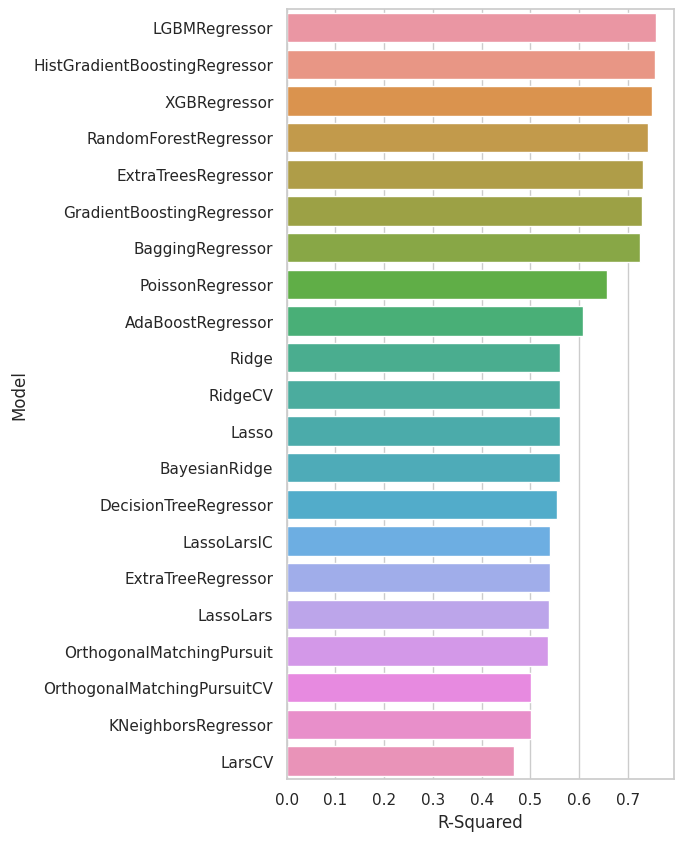

In [ ]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index[:-15], x="R-Squared", data=predictions[:-15])